In [96]:
import imageio as iio
import visvis as vv
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplot
import pandas as pd
from PIL import Image
import csv
import os
%matplotlib inline
pd.options.mode.chained_assignment = None  

# Set working directories
directory = r'C:\Users\jeric\OneDrive\Documents\classFiles\DSC680\Project_1-new\puppeteer_scrape\images\\'
directory2 = r'C:\Users\jeric\OneDrive\Documents\classFiles\DSC680\Project_1-new\puppeteer_scrape\thumbs\\'
directory3 = r'C:\Users\jeric\OneDrive\Documents\classFiles\DSC680\Project_1-new\puppeteer_scrape\thumbs_min\\'

####  Bring in the Winner's csv data

In [97]:
df = pd.read_csv(r'C:\Users\jeric\OneDrive\Documents\classFiles\DSC680\Project_1-new\puppeteer_scrape\data.csv', header = None)
df.columns = ['hash','site_nm', 'date','country','img_url','img_full_nm']
df['winner'] = 1

print("Rows in df: "+str(len(df)))

df.head()

Rows in df: 4686


,hash,site_nm,date,country,img_url,img_full_nm,winner
0,8ddbf2f936a5fca98539799183a36a2b,Marble,"June 11, 2022",Netherlands,https://assets.awwwards.com/awards/media/cache...,8ddbf2f936a5fca98539799183a36a2b.jpg,1
1,b4ef75558f97d08d285bce6174d1dd84,POLA: Mother's Day,"June 10, 2022",Japan,https://assets.awwwards.com/awards/media/cache...,b4ef75558f97d08d285bce6174d1dd84.jpg,1
2,ea4e13c773862ebf76812971cdd07b25,Zulu Longines,"June 9, 2022",France,https://assets.awwwards.com/awards/media/cache...,ea4e13c773862ebf76812971cdd07b25.jpg,1
3,33e8c7a0c2c17fbc7bafffb80f808bbe,Ana Blagojevic,"June 8, 2022",Italy,https://assets.awwwards.com/awards/media/cache...,33e8c7a0c2c17fbc7bafffb80f808bbe.png,1
4,caec15565ed1b1b6efec6585191a0530,Kim Kneipp Folio,"June 7, 2022",United States,https://assets.awwwards.com/awards/media/cache...,caec15565ed1b1b6efec6585191a0530.png,1


####  Bring in the Nominee's csv data

In [98]:
df2 = pd.read_csv(r'C:\Users\jeric\OneDrive\Documents\classFiles\DSC680\Project_1-new\puppeteer_scrape\data_noms.csv', header = None)
df2.columns = ['hash','site_nm', 'date','country','img_url','img_full_nm']
df2['winner'] = 0

print("Rows in df: "+str(len(df2)))

df2.head()

Rows in df: 13083


,hash,site_nm,date,country,img_url,img_full_nm,winner
0,f810500fcf4ffdbd89571a469951c835,July,10-Jun-22,United States,https://assets.awwwards.com/awards/media/cache...,f810500fcf4ffdbd89571a469951c835.png,0
1,3f2dfa1d6327bbd1058ff43834491597,Cobo©,10-Jun-22,Netherlands,https://assets.awwwards.com/awards/media/cache...,3f2dfa1d6327bbd1058ff43834491597.jpg,0
2,2777b6d0afb87d89ffa9f84d89704145,Paul McCartney,10-Jun-22,United Kingdom,https://assets.awwwards.com/awards/media/cache...,2777b6d0afb87d89ffa9f84d89704145.png,0
3,36301ba2bb96c74c9c9b9deecd7cb79a,Callista,10-Jun-22,Netherlands,https://assets.awwwards.com/awards/media/cache...,36301ba2bb96c74c9c9b9deecd7cb79a.jpg,0
4,fe15f5752fdbdd501cddcc17012a057f,.PEAM,10-Jun-22,Germany,https://assets.awwwards.com/awards/media/cache...,fe15f5752fdbdd501cddcc17012a057f.png,0


#### Comparing CSV Files

In [99]:
df['date'] = pd.to_datetime(df['date']) #winners
df2['date'] = pd.to_datetime(df2['date']) #nominees

print("Winner's record count: "+str(len(df)))
print("Winner's min date: "+str(df['date'].min()))
print("Winner's max date: "+str(df['date'].max()))
print(" ")
print("Nominee's record count: "+str(len(df2)))
print("Nominee's min date: "+str(df2['date'].min()))
print("Nominee's min date: "+str(df2['date'].max()))

Nom_Min = df2['date'].min()
Nom_Max = df2['date'].max()

print(Nom_Min)
print(Nom_Max)

Winner's record count: 4686
Winner's min date: 2009-06-01 00:00:00
Winner's max date: 2022-06-11 00:00:00
 
Nominee's record count: 13083
Nominee's min date: 2019-12-05 00:00:00
Nominee's min date: 2022-06-10 00:00:00
2019-12-05 00:00:00
2022-06-10 00:00:00


#### Trimming Winner's dataframe to match date range of nominee's dataframe

In [100]:
df2_trunc = df[(df.date <= Nom_Max) & (df.date>= Nom_Min)]
len(df2_trunc)

906

#### Remove Winners from Nominees dataset

In [101]:
print("Winner(1) count in nominee's dataframe")
df3 = pd.DataFrame()
df3 = df2.assign(winner=df2_trunc['site_nm'].isin(df2['site_nm']).astype(int))
df3.groupby(['winner'], dropna=False, as_index=False).size()

Winner(1) count in nominee's dataframe


,winner,size
0,0.0,14
1,1.0,892
2,NaN,12177


#### Setting NaNs to zero

In [102]:
print("Winner(1) count in dataframe after checking against winner's file")
df3['winner'] = df3['winner'].fillna(0)
df3.groupby(['winner'], dropna=False, as_index=False).size()

Winner(1) count in dataframe after checking against winner's file


,winner,size
0,0.0,12191
1,1.0,892


#### Dropping duplicates from nominees dataset

In [103]:
df3 =  df3[df3.winner != 1]
df3.groupby(['winner'], dropna=False, as_index=False).size()

,winner,size
0,0.0,12191


#### Combining datasets into 1 dataframe

In [104]:
print("Winner Dataframe length: "+str(len(df2_trunc)))
print("Non-winning Nominees Dataframe length:"+str(len(df3)))
print("Should add to: "+ str(len(df2_trunc)+len(df3)))

cmb_df = pd.concat([df3,df2_trunc], axis = 'rows')
len(cmb_df)


Winner Dataframe length: 906
Non-winning Nominees Dataframe length:12191
Should add to: 13097


13097

In [111]:
cmb_df['winner'].value_counts()

0.0    12191
1.0      906
Name: winner, dtype: int64

#### Identify and drop any records with image issues (404 errors)

In [112]:
n=0
tot = 0
for i, row in cmb_df.iterrows():
    tot = tot + 1
    filename = row[5]
    try:
        img = Image.open(directory+filename)
        if img is not None:
            cmb_df.at[i,'404_error'] = 0
           
    except:   
        cmb_df.at[i,'404_error'] = 1
        n = n+1

print("Total Images: "+ str(tot))
print("Error Images: "+str(n))

Total Images: 13097
Error Images: 3282


In [113]:
cmb_df_2 = cmb_df[(cmb_df['404_error']==0)]
len(cmb_df_2[(cmb_df_2['404_error']==1)])

0

In [114]:
len(cmb_df_2)

9815

In [120]:
cmb_df_2['winner'].value_counts()

0.0    8918
1.0     897
Name: winner, dtype: int64

#### Creating 50 X 50 copies of images

In [ ]:
#####################
### ONLY RUN THIS ONCE
#####################
for i, row in cmb_df.iterrows():
    filename = row[5]
    try:
        img = Image.open(directory+filename)
        if img is not None:
            image = Image.open(directory+filename)
            image = image.convert('RGB')
            image.thumbnail((50,50))
            image.save(directory3+row[0]+'.jpg')
    except:
        print("skipped")

#### Add unique color count from 50X50 images to dataframe 

In [124]:
##Checking that all rows in dataframe were updated
missing_color_count = len(cmb_df_2[cmb_df_2['unique_color_count_50'].isnull() == True])
print("Missing Color Count: " + str(missing_color_count))


Missing Color Count: 0


In [125]:
print("Max Color Count:" +str(max(cmb_df_2['unique_color_count_50'])))
print("Min Color Count:"+str(min(cmb_df_2['unique_color_count_50'])))

Max Color Count:1817.0
Min Color Count:22.0


In [126]:
cmb_df_2['winner'].value_counts()

0.0    8918
1.0     897
Name: winner, dtype: int64

#### Question 1: How many Unique colors are there in the images?

Helps answer the question: Do more colors have an impact on likelihood to win an award?

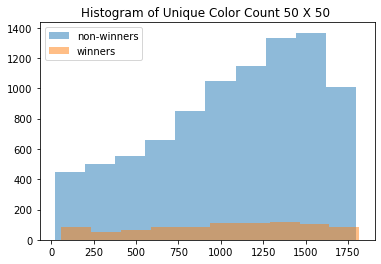

In [127]:
from matplotlib import pyplot
%matplotlib inline

pyplot.hist(cmb_df_2[(cmb_df_2.winner == 0)]['unique_color_count_50'], label = 'non-winners', alpha=0.5)
pyplot.hist(cmb_df_2[(cmb_df_2.winner == 1)]['unique_color_count_50'], label = 'winners', alpha=0.5)
pyplot.legend(loc='upper left')
pyplot.title('Histogram of Unique Color Count 50 X 50 ')

pyplot.show()

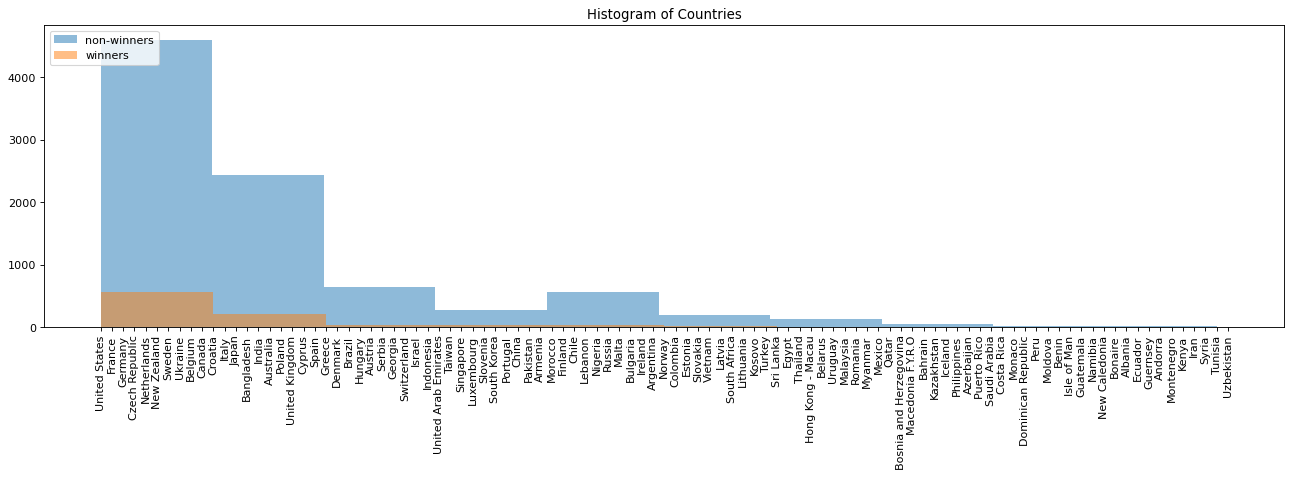

In [128]:
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80)
pyplot.hist(cmb_df_2[(cmb_df_2.winner == 0)]['country'], label = 'non-winners', alpha=0.5)
pyplot.hist(cmb_df_2[(cmb_df_2.winner == 1)]['country'], label = 'winners', alpha=0.5)
pyplot.legend(loc='upper left')
pyplot.title('Histogram of Countries')
pyplot.xticks(rotation = 90)
pyplot.show()

#### What is the average color of the images?

In [129]:
n = 0
for i, row in cmb_df_2.iterrows():
    filename = row[0]
    try:
        img = Image.open(directory3+filename+'.jpg')
        if img is not None:
            img_temp = img.copy()
            colors = np.average(img, axis=(0,1))
            colors[0] = round((colors[0]/256),0)
            colors[1] = round((colors[1]/256),0)
            colors[2] = round((colors[2]/256),0)
            hex_val = matplotlib.colors.to_hex([colors[0],colors[1],colors[2]])
            cmb_df_2.at[i,'average_color'] = hex_val
    except:
        n = n+1

print("errors: "+str(n))

errors: 0


#### Getting Most Frequent Color by Clustr

In [134]:
from colorthief import ColorThief

n = 0
n2 = 0
for i, row in cmb_df_2.iterrows():
    filename = row[0]
    try:
        img = Image.open(directory3+filename+'.jpg')
        if img is not None:
            img = img.convert('RGB')
            color_thief = ColorThief(directory3+filename+'.jpg')
            colors = color_thief.get_color(quality=1)
            colors = list(colors)
            colors[0] = round((colors[0]/256),0)

            colors[1] = round((colors[1]/256),0)
            colors[2] = round((colors[2]/256),0)
            hex_val = matplotlib.colors.to_hex([colors[0],colors[1],colors[2]])
            cmb_df_2.at[i,'dominant_color'] = hex_val
            n2 = n2+1
    except:
        n = n+1

print("errors: "+str(n))
print("Records Udpated: "+ str(n2))

errors: 0
Records Udpated: 9815


<AxesSubplot:title={'center':'Winners Average Image Color'}, xlabel='Average Color'>

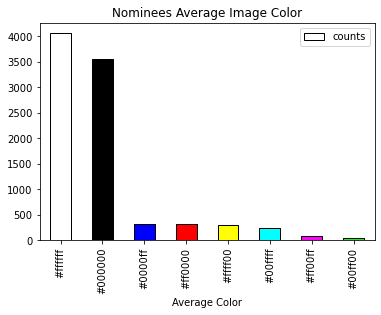

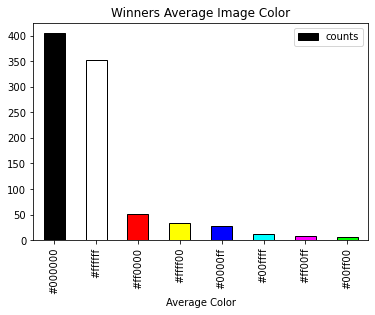

In [196]:

avg_non = cmb_df_2[(cmb_df_2.winner == 0)]
avg_win = cmb_df_2[(cmb_df_2.winner == 1)]

avg_colors_non = avg_non['average_color'].value_counts().rename_axis('Average Color').reset_index(name='counts')
avg_colors_win = dom_win['average_color'].value_counts().rename_axis('Average Color').reset_index(name='counts')
colors_nom = avg_colors_non['Average Color']
colors_win = avg_colors_win['Average Color']
avg_colors_non.plot.bar(x='Average Color',y='counts',color= colors_nom,  edgecolor = 'black', title= 'Nominees Average Image Color')
avg_colors_win.plot.bar(x='Average Color',y='counts',color= colors_win,  edgecolor = 'black', title= 'Winners Average Image Color')

<AxesSubplot:title={'center':'Winners Dominant Image Color'}, xlabel='Dominant Color'>

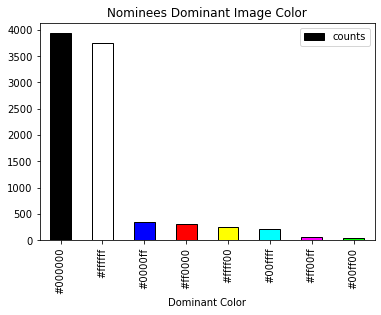

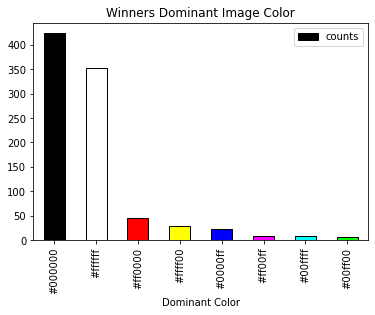

In [195]:
dom_non = cmb_df_2[(cmb_df_2.winner == 0)]
dom_win = cmb_df_2[(cmb_df_2.winner == 1)]

dom_colors_non = dom_non['dominant_color'].value_counts().rename_axis('Dominant Color').reset_index(name='counts')
dom_colors_win = dom_win['dominant_color'].value_counts().rename_axis('Dominant Color').reset_index(name='counts')
colors_nom = dom_colors_non['Dominant Color']
colors_win = dom_colors_win['Dominant Color']
dom_colors_non.plot.bar(x='Dominant Color',y='counts',color= colors_nom,  edgecolor = 'black', title= 'Nominees Dominant Image Color')
dom_colors_win.plot.bar(x='Dominant Color',y='counts',color= colors_win,  edgecolor = 'black', title= 'Winners Dominant Image Color')

#### Save work to CSV to save time for future work

In [183]:
cmb_df_2.to_csv('savedwork.csv',index=False)